<a href="https://colab.research.google.com/github/Sandeep0076/Miscellaneous-Data-Science-Projects/blob/main/ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <Center>**Exploratory Data Analysis**

**Steps of Data Exploration and Preparation:**


* **Variable Identification**: First, identify Predictor (**Input**) and **Target** (output) variables. 
*   **Missing Value** Treatment
* **Univariate analysis**: Uni - to understand the central tendency and spread of the variable. if categorical then count
*  **Bivariate analysis** : association and disassociation between variables , scatter plot, corelation . Categorical & Categorical relationship- count% of observations available, chi2 test. Categorical & Continuous: ztest, t test, annova test 
*   Techniques of **Outlier Detection** and Treatment : visualization methods, like Box-plot, Histogram, Scatter Plot . Any value, which is beyond the range of -1.5 x **IQR** to 1.5 x IQR. `Solved either by  deleting or Transforming and binning values.

**The Art of Feature Engineering**


*   What is Variable **Transformation** ?
*   What is feature variable **creation** and its benefits ?

In [ ]:
#@title 
from IPython.display import Image
from google.colab import drive
drive.mount("/content/Gdrive");
import datetime


Mounted at /content/Gdrive


In [ ]:
#@title Import dataset
import pandas as pd
df = pd.read_csv('/content/Gdrive/MyDrive/Data science/Stainless-Steel-Prices-Forecasty-Assignment.csv')
df.head()

,Date,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
0,7/1/2013,0.827352,20575,10568,127.191304,82.222360,227.022942,13750.31522,1837.619565,-0.4,104.545217,1062,98.80018,99.64265,100.1044,101.1423,99.43615,100.6230,50.9,6906.64
1,8/1/2013,0.760221,20609,10821,137.055000,82.221429,232.234194,14308.26190,1896.392857,0.5,106.546364,1132,99.04874,99.91766,100.3962,101.1938,99.64082,100.6545,55.4,7186.25
2,9/1/2013,0.784715,20761,10774,134.185714,83.295918,234.335594,13801.39286,1846.880952,0.1,106.313809,2003,99.27196,100.18490,100.5363,101.2066,99.84383,100.6646,55.7,7159.27
3,10/1/2013,0.769293,20735,11291,132.572727,85.443634,229.393932,14117.65217,1884.836957,-0.1,100.500435,1504,99.40488,100.36330,100.5771,101.1835,100.02300,100.6666,56.2,7203.02
4,11/1/2013,0.750242,20854,11559,136.323810,88.363265,225.437049,13684.01190,1866.416667,2.1,93.812381,1821,99.36221,100.49830,100.5459,101.1283,100.17150,100.6744,56.4,7070.65


Next steps:
1.  Checking data types and converting into proper format 
2.   Missing Values, nulls and nans
3. Dimention reduction / feature selection
5. smooting(time series)
6. Feature creation
7. Different type of categorical data 
8. Input scaling
9. Handle Outliers





### 1,2. Checking data types and null values. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      84 non-null     object 
 1   StainlessSteelPrice       84 non-null     float64
 2   Steel_Inventory_M_USD     84 non-null     int64  
 3   Steel_Orders_M_USD        84 non-null     int64  
 4   IronOre_Global_USD        84 non-null     float64
 5   CoalAustralia_Global_USD  84 non-null     float64
 6   Energy_Index              84 non-null     float64
 7   Nickel_Global_USD         84 non-null     float64
 8   Zinc_Global_USD           84 non-null     float64
 9   Freight_Transport_Index   84 non-null     float64
 10  WTI_Crude_Global_USD      84 non-null     float64
 11  Baltic_Dry_Index          84 non-null     int64  
 12  BCI_China                 84 non-null     float64
 13  BCI_Europe                84 non-null     float64
 14  BCI_US      

<Center> No null or nan values are found. 

In [ ]:
# Convert object datatype into Data 
df['Date'] = pd.to_datetime(df['Date'], yearfirst=False, infer_datetime_format=True)
df.sort_values(by='Date', ascending=True, inplace=True)
df_date = df.copy()

### Creating new columns

In [ ]:
import datetime
import numpy as np
# Setting date as index for easy datewise analysis
df_date.set_index('Date', inplace=True)
df.sort_values(by='Date', ascending=True, inplace=True)

# Creating additional columns for months and year to see the Sales monthy/year wise
df_date['month'] = pd.to_datetime(df_date.index.values).month
df_date['year'] = pd.DatetimeIndex(df_date.index.values).year
# Creating seasons

df_date['seasons'] = df_date.month%12 // 3 + 1

In [ ]:
df_date.head(1)

,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD,month,year,seasons
Date,,,,,,,,,,,,,,,,,,,,,,
2013-07-01,0.827352,20575,10568,127.191304,82.22236,227.022942,13750.31522,1837.619565,-0.4,104.545217,1062,98.80018,99.64265,100.1044,101.1423,99.43615,100.623,50.9,6906.64,7,2013,3


In [ ]:
# Variable Identification: First, identify Predictor (Input) and Target (output) variables.
x = df_date.drop(columns=['StainlessSteelPrice']) # Input
y = df_date.StainlessSteelPrice # Target

## Feature Selection

####  1. Removal by variance 

Check if there are features with constant valuues

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_threshold = VarianceThreshold(threshold=0.0)
var_threshold.fit(x)
#shows which all columns has variance
print(var_threshold.get_support())
# contains columsn names hwihc are have 0 variance and can be removed.
cl = [column for column in x.columns if column not in x.columns[var_threshold.get_support()]]
print(cl)
#finally can remove columsn 
x_train = x.drop(columns=cl, axis=1)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
[]


<Center> None of the feature have constant values 

#### 2. Drop Features Using Pearson Correlation

Check the correlation between different features and features which are highly corelated can be removed as they simply act as a duplicate feature

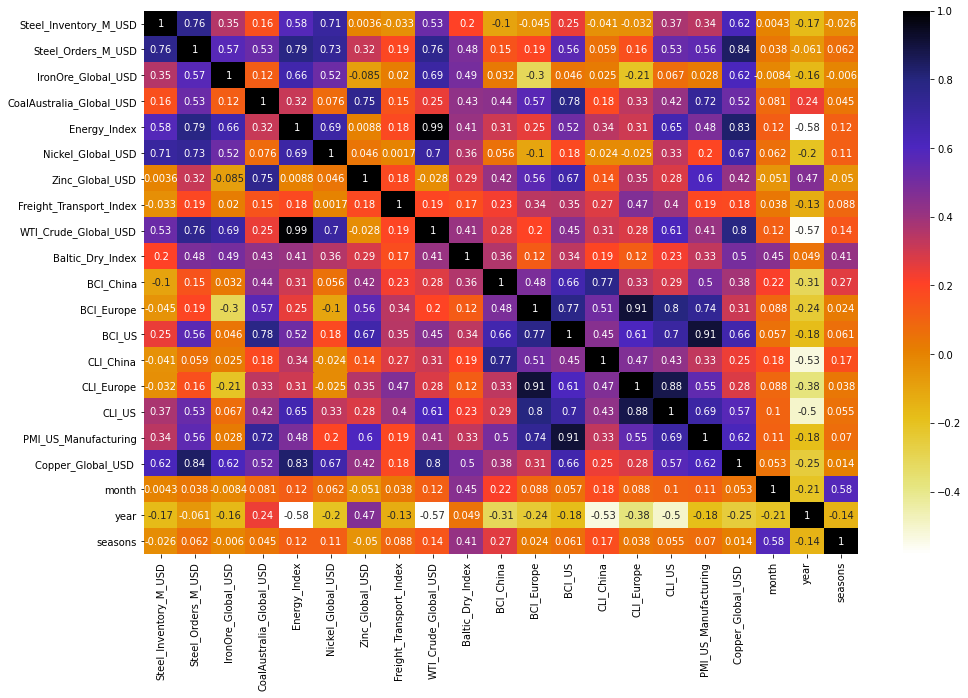

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize =(16,10))
cor =x.corr()
sns.heatmap(cor, annot=True, cmap =plt.cm.CMRmap_r)
plt.show()

<Center> The above plot shows correlation between different features. Many  features like PMI_US_Manufacturing and  BCI_US, CLI_Europe and BCI_Europe etc are higly positively corelated.

In [ ]:
# With the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(x, 0.8)
print(len(set(corr_features)))
# There are 5 features which are highly corelated and if given to model as an input, it will act as duplicate values and not good for the predictions. 
print(corr_features)

5
{'Copper_Global_USD ', 'WTI_Crude_Global_USD', 'PMI_US_Manufacturing', 'CLI_US', 'CLI_Europe'}


In [ ]:
#Now we can drop these columns from our dataset. 
x_corr = x.drop(corr_features,axis=1)

In [ ]:
x_corr.head(1)

,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,month,year,seasons
Date,,,,,,,,,,,,,,,,
2013-07-01,20575,10568,127.191304,82.22236,227.022942,13750.31522,1837.619565,-0.4,1062,98.80018,99.64265,100.1044,101.1423,7,2013,3


### 3. Mutual information gain 

Capture information based on entropy and information gain

In [ ]:
# This is for regression problem
from sklearn.feature_selection import mutual_info_regression
# this is for classoification problems:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
# Fit the data into the info model so that it can calculate the score of each of the feature 
# Mutual information (MI) [1] between two random variables is a non-negative value, which measures
# the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

mutual_info = mutual_info_regression(x_corr.values, df_date.StainlessSteelPrice.values)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_corr.columns
mutual_info.sort_values(ascending=False)
#It can be used for univariate features selection, 

year                        0.604355
Nickel_Global_USD           0.589863
Steel_Orders_M_USD          0.548424
Energy_Index                0.542840
IronOre_Global_USD          0.530374
CoalAustralia_Global_USD    0.504919
Steel_Inventory_M_USD       0.400448
CLI_China                   0.325240
BCI_US                      0.282890
Zinc_Global_USD             0.252052
Baltic_Dry_Index            0.219112
month                       0.213153
BCI_Europe                  0.181683
seasons                     0.170362
BCI_China                   0.076278
Freight_Transport_Index     0.000000
dtype: float64

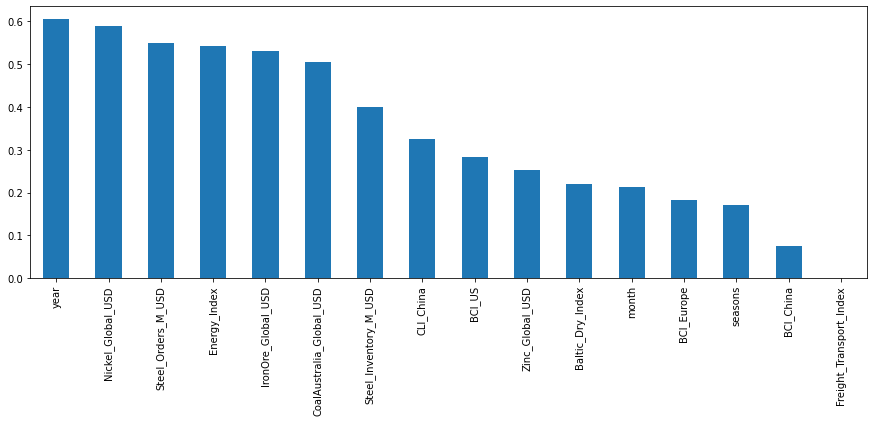

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [ ]:
from sklearn.feature_selection import SelectPercentile

In [ ]:
# Select top 20% 
select_top_20 = SelectPercentile(mutual_info_regression, percentile=50)
select_top_20.fit(x_corr.values, df_date.StainlessSteelPrice.values)
#x_corr.columns[select_top_20.get_support()]

SelectPercentile(percentile=50,
                 score_func=<function mutual_info_regression at 0x7f42f8c459e0>)

In [ ]:
feature_mutual_inf_gain = x_corr[x_corr.columns[select_top_20.get_support()]]

In [ ]:
feature_mutual_inf_gain.head(1)

,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,CLI_China,year
Date,,,,,,,,
2013-07-01,20575,10568,127.191304,82.22236,227.022942,13750.31522,101.1423,2013


### 4. SelectKBest

In [ ]:
# Select features according to the k highest scores.
from sklearn.feature_selection import SelectKBest, chi2 # best for classification task for gergression other methods with SelectKbest
x_corr
y = df_date.StainlessSteelPrice

### 5. ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
#This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees)
# on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
import matplotlib.pyplot as plt
#from sklearn.ensemble import ExtraTreesClassifier #for classification

In [ ]:
model = ExtraTreesRegressor()
model.fit(x_corr,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
# feature_importances_
#The impurity-based feature importances.
# The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction
# of the criterion brought by that feature. It is also known as the Gini importance.

model.feature_importances_

array([0.07386347, 0.28050984, 0.06484424, 0.03649432, 0.05342974,
       0.23721353, 0.02439502, 0.00953726, 0.0231964 , 0.01543613,
       0.0104729 , 0.02163245, 0.03918378, 0.0284943 , 0.04234742,
       0.0389492 ])

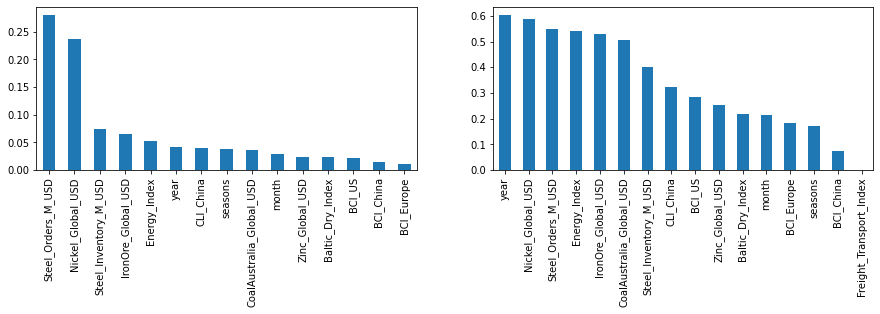

In [ ]:
# converting the values of feature importance into bar graph for better visulization.
feature_import = pd.Series(model.feature_importances_,index=x_corr.columns)
plt.subplot(1, 2, 1)
feature_import.nlargest(15).plot(kind='bar',figsize=(15, 3))
plt.subplot(1, 2, 2)
mutual_info.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [ ]:
# We can use cross validation score to judge which feature selection method worked the best
from sklearn.model_selection import cross_val_score
#cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='neg_log_loss').mean()

In [ ]:
#selecting top 8 features
feature_import.nlargest(8).index

Index(['Steel_Orders_M_USD', 'Nickel_Global_USD', 'Steel_Inventory_M_USD',
       'IronOre_Global_USD', 'Energy_Index', 'year', 'CLI_China', 'seasons'],
      dtype='object')

In [ ]:
# including target for removing outliars 
final_features = df_date[['StainlessSteelPrice','Steel_Orders_M_USD', 'Nickel_Global_USD', 'Steel_Inventory_M_USD','IronOre_Global_USD', 'Energy_Index', 'CoalAustralia_Global_USD','Zinc_Global_USD', 'seasons']]

In [ ]:
final_features.head(2)

,StainlessSteelPrice,Steel_Orders_M_USD,Nickel_Global_USD,Steel_Inventory_M_USD,IronOre_Global_USD,Energy_Index,CoalAustralia_Global_USD,Zinc_Global_USD,seasons
Date,,,,,,,,,
2013-07-01,0.827352,10568,13750.31522,20575,127.191304,227.022942,82.222360,1837.619565,3
2013-08-01,0.760221,10821,14308.26190,20609,137.055000,232.234194,82.221429,1896.392857,3



### Removing outliars

There different ways to detect the outloars. Some of the examples are :


*   Using scatterlot
*   Box plot
*   Using Zscore
*   Using IQR interQuantileRange
* Removal With Mahalanobis Distance


In [ ]:
#can also use standard deviation or z-score for this purpose.
# upper_limit = df_out.StainlessSteelPrice.mean() + 3*df_out.StainlessSteelPrice.std()
# lower_limit = df_out.StainlessSteelPrice.mean() - 3*df_out.StainlessSteelPrice.std()

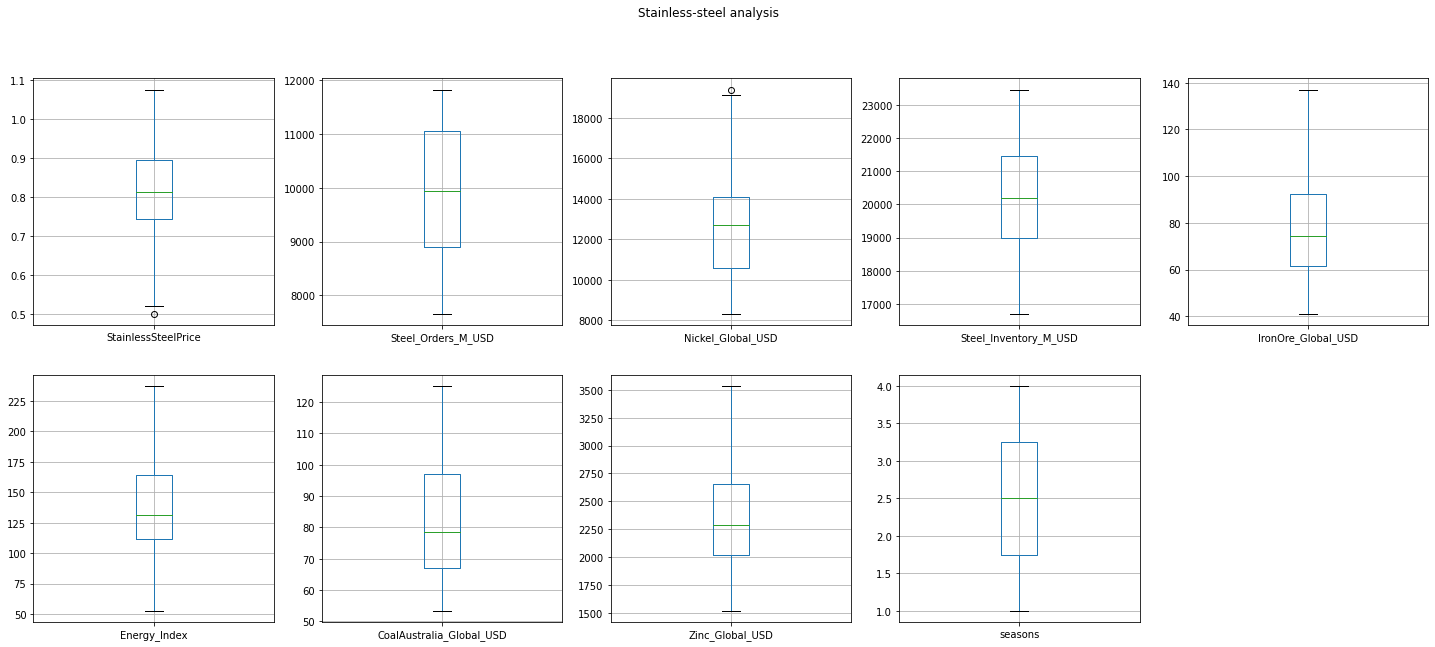

In [ ]:
# IQR is the interquartile range
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
final_features.plot(kind='box', subplots=True, grid=True, title="Stainless-steel analysis",
             layout=(2, 5), sharex=True, sharey=False, legend=True);

<Center> From the box plot, we can see the outlier in column Nickel_Global_USD and Stainles steel features.

In [ ]:
#@title 
from IPython.display import Image
Image('https://i.stack.imgur.com/2VvuE.png', width=800, height=400)



Quantile 1/Q1: 25th Percentile

Interquartile Range (IQR): 25th percentile to the 75th percentile.

Median (Quantile 2/Q2): 50th Percentile.

Quantile 3/Q3: 75th Percentile.

The blue part are the whiskers of the boxplot.

In [ ]:
q_low = final_features["StainlessSteelPrice"].quantile(0.05)
q_hi  = final_features["StainlessSteelPrice"].quantile(0.95)

df_filtered = final_features[(final_features["StainlessSteelPrice"] < q_hi) & (final_features["StainlessSteelPrice"] > q_low)]

In [ ]:
q_low = df_filtered["Nickel_Global_USD"].quantile(0.05)
q_hi  = df_filtered["Nickel_Global_USD"].quantile(0.95)

df_filtered2 = df_filtered[(df_filtered["Nickel_Global_USD"] < q_hi) & (df_filtered["Nickel_Global_USD"] > q_low)]

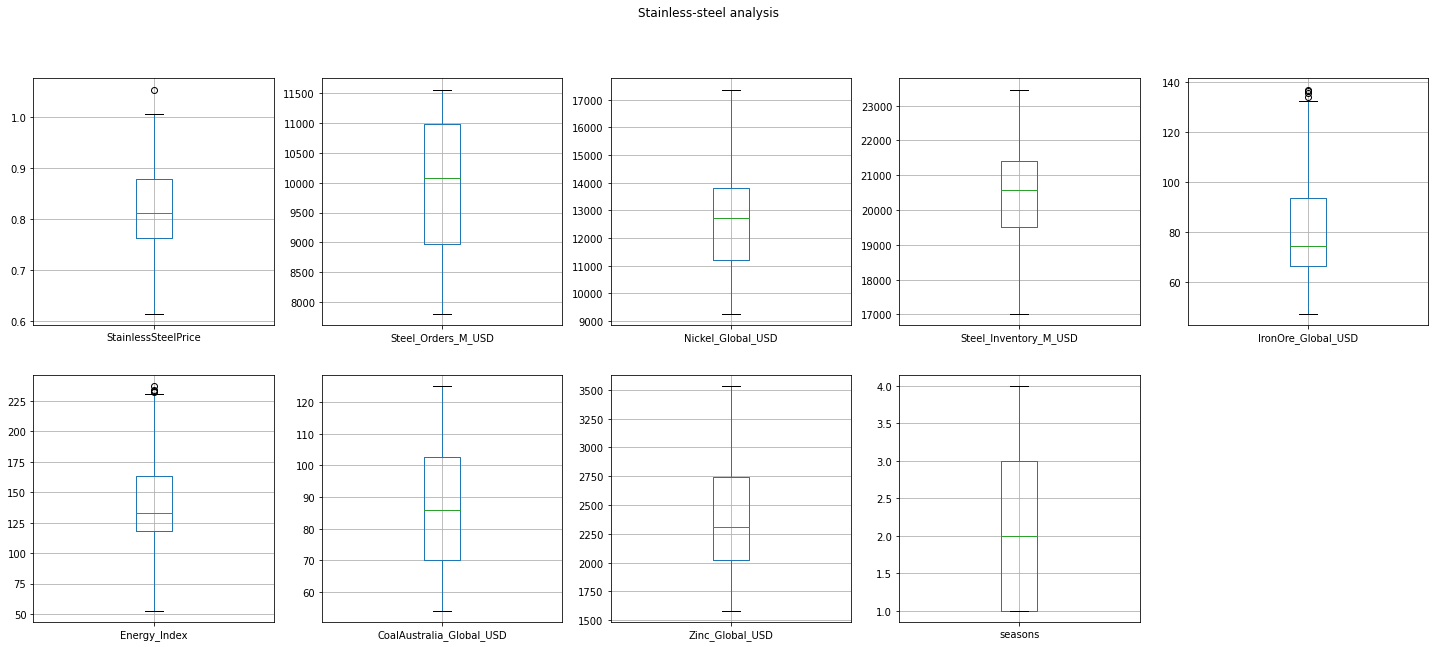

In [ ]:
rcParams['figure.figsize'] = 25, 10
df_filtered2.plot(kind='box', subplots=True, grid=True, title="Stainless-steel analysis",
             layout=(2, 5), sharex=True, sharey=False, legend=True);

In [ ]:
#Undermentioned code is to remove outliers from all the features 
from scipy import stats
#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

### Multivariate Outlier Removal With Mahalanobis Distance


In [ ]:

covariance_matrix = np.cov(final_features.values, rowvar=False)  

In [ ]:

inv_covariance_matrix = np.linalg.inv(covariance_matrix)

But before proceeding, we should check, as mentioned above, if the matrix and its inverse are Symmetric and Positive Definite. We use for this Cholesky Decomposition Algorithm, which, fortunately, is already implemented in numpy.linalg.cholesky:

In [ ]:
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False 

Then, we find the mean m of the variables on each feature (shall I say dimension) and save them in an array like this:



In [ ]:
vars_mean = []
for i in range(final_features.values.shape[0]):
    vars_mean.append(list(final_features.values.mean(axis=0)))  
    # axis=0 means each column in the 2D array

Next, we find x - m (i.e. the differential), but since we already have the vectorized vars_mean, all we need to do is:

In [ ]:
diff = final_features.values - vars_mean
# here we subtract the mean of feature
# from each feature of each example

In [ ]:
#Finally, apply the formula like this: 
md = []
for i in range(len(diff)):
    md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i]))) 

In [ ]:
def MahalanobisDist(data, verbose=False):
  #The Covariance represents the direction of the relationship between two variables (i.e. positive, negative or zero),
  # so it shows the strength of how one variable is related to the changes of the others.
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
         #find the Inverse of the Covariance Matrix:
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)

        #Then, we find the mean m of the variables on each feature (shall I say dimension) and save them in an array like this:
        if is_pos_def(inv_covariance_matrix):
            vars_mean = []
            for i in range(data.shape[0]):
                vars_mean.append(list(data.mean(axis=0)))
            #Next, we find x - m (i.e. the differential), but since we already have the vectorized vars_mean, all we need to do is:
            diff = data - vars_mean # here we subtract the mean of feature
            
            ##Finally, apply the formula like this: 
            md = []
            for i in range(len(diff)):
                md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))

            if verbose:
                #print("Mahalanobis Distance:\n {}\n".format(md))
                pass
            return md
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")


def MD_detectOutliers(data, extreme=False, verbose=False):
    MD = MahalanobisDist(data, verbose)

    std = np.std(MD)
    k = 3. * std if extreme else 2. * std
    m = np.mean(MD)
    up_t = m + k
    low_t = m - k
    outliers = []
    for i in range(len(MD)):
        if (MD[i] >= up_t) or (MD[i] <= low_t):
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

# But before proceeding, we should check, as mentioned above, if the matrix and its inverse are Symmetric and Positive Definite.
# We use for this Cholesky Decomposition Algorithm, which, fortunately, is already implemented in numpy.linalg.cholesky:
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False
outliers_indices = MD_detectOutliers(final_features.values, verbose=True)

print("Outliers Indices: {}\n".format(outliers_indices))
#print("Outliers:")
#for ii in outliers_indices:
    #print(final_features.values[ii])

Outliers Indices: [ 5 25 40 48 81]



In [ ]:
outliers_indices

array([ 5, 25, 40, 48, 81])

In [ ]:
final_features.values[5]

array([7.73828583e-01, 1.02320000e+04, 1.39245500e+04, 2.11580000e+04,
       1.35790476e+02, 2.33481929e+02, 8.94444643e+01, 1.97497500e+03,
       1.00000000e+00])

In [ ]:
new = final_features.reset_index()
new_df = new.drop(outliers_indices)
new_df.set_index('Date', inplace=True)
new_df.sort_values(by='Date', ascending=True, inplace=True)

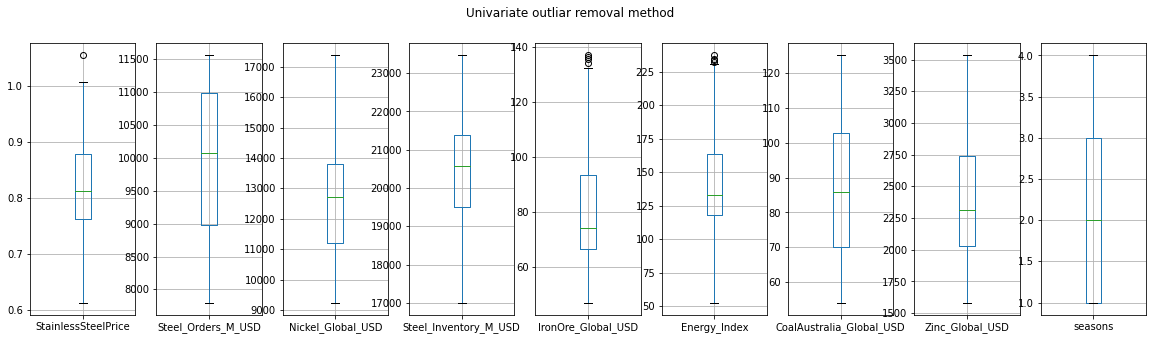

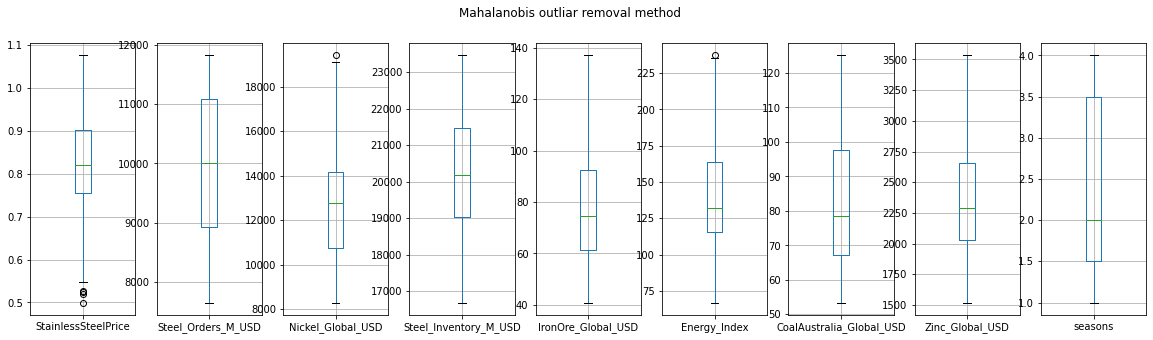

In [ ]:
rcParams['figure.figsize'] = 20, 5
df_filtered2.plot(kind='box', subplots=True, grid=True, title="Univariate outliar removal method",
             layout=(1, 9), sharex=True, sharey=False, legend=True);
new_df.plot(kind='box', subplots=True, grid=True, title="Mahalanobis outliar removal method",
             layout=(1, 9), sharex=True, sharey=False, legend=True);

In [ ]:
#@title After removing outliers
print(f'Total length of dataset is ; {len(df_date)}')
print(f'Length of dataset after removing outliers by using univariate method is ; {len(df_filtered2)}')
print(f'Length of dataset after removing outliers by using Mahalanobis method is ; {len(new_df)}')

Total length of dataset is ; 84
Length of dataset after removing outliers by using univariate method is ; 65
Length of dataset after removing outliers by using Mahalanobis method is ; 79


In [ ]:
# Dividing the data into  train, test
train_size = int(len(new_df)*.85)
test_size = len(new_df) - train_size
train,test = new_df.iloc[0:train_size], new_df.iloc[train_size:len(new_df)]
print(train.shape, test.shape)

(67, 9) (12, 9)


### Scaling the data 

In [ ]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaled_train = scaler.fit_transform(train)

In [ ]:
# this deosnt work if the data has negetive values.

# best_features = SelectKBest(score_func=chi2, k=10)
# #fit= best_features.fit(x,y)

# df_score = pd.DataFrame(fit.scores_)
# df_columns = pd.DataFrame(x.columns)
# #concatenate
# feature_score = pd.concat([df_score,df_columns], axis=1)

#feature_score.nlargest(10,'score')

Creating less labels if there are many labels

In [ ]:
# # Create a series out of the Country column
# countries = so_survey_df['Country']

# # Get the counts of each category
# country_counts = countries.value_counts()

# # Create a mask for only categories that occur less than 10 times
# mask = countries.isin(country_counts[country_counts < 10].index)

# # Label all other categories as Other
# countries[mask]= 'Other'

# # Print the updated category counts
# print(countries.value_counts())

Creating bins or groups of a feature:

In [ ]:
# Bin the continuous variable ConvertedSalary into 5 bins
import numpy as np
so_survey_df['equal_binned'] = pd.cut(so_survey_df['ConvertedSalary'], 
                                bins=[-np.inf,0,50000,100000,150000,np.inf],
                                labels=[0,1,2,3,4]
                                )

# Print the first 5 rows of the equal_binned column
print(so_survey_df[['equal_binned', 'ConvertedSalary']].head())

## **Statistical test**



1.   T test
2.   Chi Square Test
3. Anova test

if there is one chategorical feature then we need to apply one sample proportion test. if the value of the p is less than .05 then we reject the null hypothesis and accept the alternate hypothesis 

If there are 2 chategorical features then chi square test. An assocciation between two categorical features like sex and smoker, then we use it 

If its continous variable : T test 

If there are 2 numerical feaures :  test : Correlation and also apply t Test 

if more categorical (more than 2 )features and numerical :  Annova test 


### pd.crosstab(feat1, feature 2) = give a matrix of 2 by two with count of categorical featues